In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import pandas as pd
import glob
import numpy as np
import datetime
from os import path
from google.colab import drive
import seaborn as sns

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
doubt = ['A01369_2020-03-23',
 'A00685_2020-03-05',
 'A00723_2020-04-01',
 'A01240_2020-03-27',
 'A00691_2020-03-18',
 'A01296_2020-03-22',
 'A00872_2020-03-13',
 'A01297_2020-03-10',
 'A01181_2020-03-22',
 'A00193_2020-04-09',
 'A01358_2020-03-16',
 'A00121_2020-03-21',
 'A01422_2020-03-23',
 'A00829_2020-03-18',
 'A01455_2020-03-17',
 'A01253_2020-03-31',
 'A01636_2020-04-01',
 'A01324_2020-04-21',
 'A00297_2020-04-01',
 'A00132_2020-04-04',
 'A01090_2020-03-24',
 'A01050_2020-04-08',
 'A01456_2020-03-30',
 'A00022_2020-03-19',
 'A00147_2020-03-09',
 'A01482_2020-03-17',
 'A01360_2020-03-31',
 'A01349_2020-04-07',
 'A00511_2020-03-23',
 'A00521_2020-04-05',
 'A01628_2020-03-19',
 'A01089_2020-03-14',
 'A01378_2020-03-17',
 'A01686_2020-03-21',
 'A00359_2020-03-21',
 'A00288_2020-03-28',
 'A01368_2020-04-11',
 'A00690_2020-03-22',
 'A00844_2020-04-12',
 'A01154_2020-03-18',
 'A00240_2020-03-22',
 'A01364_2020-03-17',
 'A00095_2020-04-05',
 'A00561_2020-04-10',
 'A00432_2020-03-10',
 'A00165_2020-03-16']

doubt1 = [
'A00723_2020-04-01',
'A00779_2020-03-23',
'A01456_2020-03-30',
'A01174_2020-03-09',
'A01686_2020-03-21',
'A01240_2020-03-27',
'A00872_2020-03-13',
'A01628_2020-03-19',
'A01349_2020-04-07',
'A01154_2020-03-18',
'A01482_2020-03-17',
'A01146_2020-03-10',
'A01559_2020-03-06',
'A01378_2020-03-17',
'A01089_2020-03-14',
'A01296_2020-03-22',
'A00432_2020-03-10',
'A00144_2020-03-27',
'A01636_2020-04-01',
'A00186_2020-03-02',
'A00297_2020-04-01',
'A01625_2020-03-03'
 ]


len(doubt)

46

In [ ]:
ct = pd.read_excel('gdrive/My Drive/Colab Notebooks/COVID/RXPSNET.xlsx')
cols = list(ct.columns)
cols[1] = 'id'
ct.columns = cols
ct.set_index('id', inplace=True)
ct

,Unnamed: 0,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,COVID/INTERSTIZIOPATIA?,ALTRO TIPO DI POLMONITE/ADDENSAMENTO,VERSAM. PLEURICO-INTERESSAM. PLEURICO
id,,,,,,,,
A01459,0,NaN,NaN,NaN,NaN,no,si,no
A00382,1,NaN,NaN,NaN,NaN,si,no,no
A00872,2,NaN,NaN,NaN,NaN,si,no,no
A00440,3,NaN,NaN,NaN,NaN,non eseguita,non eseguita,non eseguita
PSMAY0200,4,NaN,NaN,NaN,NaN,non disponibile,non disponibile,non disponibile
...,...,...,...,...,...,...,...,...
A00355,160,NaN,NaN,NaN,NaN,no,si,no
A00690,161,NaN,NaN,NaN,NaN,no,no,no
A01369,162,NaN,NaN,NaN,NaN,no,no,no


In [ ]:
may_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/COVID/may_dataset_avg.csv')

may_data.set_index('id', inplace=True)
may_data = may_data[['HCTPOC', 'KPOC', 'MCV', 'NE', 'CO2POC', 'CLPOC', 'THBPOC', 'BEPOC',
       'PLT1', 'RBC', 'COROQL', 'FIOPOC', 'CASPOC', 'MPV', 'XDP', 'METPOC',
       'PO2POC', 'CK', 'BO2POC', 'CAPOC', 'MCH', 'BISPOC', 'PCR', 'MOT', 'FG',
       'BAT', 'NAT', 'GGT', 'BILT', 'NAPOC', 'RDW', 'PTTR', 'NET', 'BILD',
       'GLUEMO', 'GLU', 'EO', 'HGB', 'LY', 'FO2POC', 'EOT', 'ALP', 'BEEPOC',
       'WBC', 'KAL', 'TROPOT', 'BA', 'LATPOC', 'ALT', 'AST', 'OFIPOC', 'BILIN',
       'FCOPOC', 'MCHC', 'HCT', 'PHPOC', 'LDH', 'CTOPOC', 'SO2POC', 'BICPOC',
       'LYT', 'UREA', 'PTINR', 'MO', 'CA', 'HHBPOC', 'ANGPOC', 'CREA', 'IL6',
       'PROBNP', 'Severity', 'Suspect', 'Sex', 'Age']]
#index = data['id']

#may_data['Suspect'] = may_data['Suspect'].apply(lambda x: 1 if x > 0 else 0)
print(may_data['Suspect'].value_counts())
#may_data = may_data[(may_data['Suspect'] == 1) | (may_data['COROQL'] == 1)]
print(may_data['Suspect'].value_counts())
#may_data = may_data[(may_data['COROQL'] == 'S1') | (may_data['COROQL'] == 'S2') | (may_data['COROQL'] == 'S0')]

X_may = may_data.drop(columns=['COROQL'])
y_may = may_data['COROQL']

X_may = X_may.apply(pd.to_numeric,errors='coerce')
may_data['COROQL'] = may_data['COROQL'].apply(lambda x: 'S1' if x == 1 else 'S0')
print(may_data['COROQL'].value_counts())
may_data
np.mean(may_data[may_data['COROQL'] == 'S0']['AST'])
X_may.shape

0.0    180
1.0     38
0.5     17
Name: Suspect, dtype: int64
0.0    180
1.0     38
0.5     17
Name: Suspect, dtype: int64
S0    203
S1     32
Name: COROQL, dtype: int64


(235, 73)

In [ ]:
galeazzi = ['COROQL','Sex','Age','CA','CK','CREA','ALP','GGT','GLU','AST','ALT','LDH','PCR',
            'KAL','NAT','UREA','WBC','RBC','HGB','HCT','MCV','MCH','MCHC','PLT1',
            'NE','LY','MO','EO','BA','NET','LYT','MOT','EOT','BAT', 'Suspect']
may_data[galeazzi].to_excel('may.xls')

In [ ]:
from sklearn.impute import KNNImputer
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/COVID/data_final_avg.csv')

data.set_index('id', inplace=True)
#data['Suspect'] = data['Suspect'].apply(lambda x: 1 if x > 0 else 0)
print(data['Suspect'].value_counts())
print(data.columns)
print(data.shape)

data = pd.concat([data, may_data])

print(data['COROQL'].value_counts())

#index = data['id']
#data.loc[doubt, 'COROQL'] = 'S1'

print(data['COROQL'].value_counts())

code_changes = []
counter_fn = 0
counter_strange = 0
for i in data.index:
  code, date = i.split('_')
  if code in ct.index:
    if ct.loc[code, 'COVID/INTERSTIZIOPATIA?'] == 'si':
      data.loc[i, 'COROQL'] = 'S1'
      code_changes.append(i)
      counter_fn += 1
    if ct.loc[code, 'COVID/INTERSTIZIOPATIA?'] != 'si' and i in doubt:
      counter_strange += 1
print(counter_fn)
print(counter_strange)

print(data['COROQL'].value_counts())

data = data[(data['COROQL'] == 'S1') | (data['COROQL'] == 'S2') | (data['COROQL'] == 'S0')]

print(data['COROQL'].value_counts())

X = data.drop(columns=['COROQL'])
y = data['COROQL']
data_swab = data.copy()
data_swab[code, 'COROQL'] = "S0"
y_swab = data_swab['COROQL']

y = np.array([1 if t == 'S1' else 1 if t == 'S2' else 0 if t == 'S0' else t for t in y])
y_swab = np.array([1 if t == 'S1' else 1 if t == 'S2' else 0 if t == 'S0' else t for t in y_swab])

missing = X.isna().sum()/X.shape[0]
missing = missing[missing > 0.75]
X = X.drop(columns=missing.index)
X = X.apply(pd.to_numeric,errors='coerce')
cols = X.columns
print(X.loc[:,'Severity'].value_counts())
print(np.unique(y, return_counts=True))

for m in missing.index:
  print(m + " " + str(missing[m]))


1.0    1121
0.5     263
0.0      22
Name: Suspect, dtype: int64
Index(['HCTPOC', 'KPOC', 'MCV', 'NE', 'CO2POC', 'CLPOC', 'THBPOC', 'BEPOC',
       'PLT1', 'RBC', 'FIOPOC', 'CASPOC', 'MPV', 'XDP', 'METPOC', 'PO2POC',
       'CK', 'BO2POC', 'CAPOC', 'MCH', 'BISPOC', 'PCR', 'MOT', 'FG', 'BAT',
       'NAT', 'GGT', 'BILT', 'NAPOC', 'RDW', 'PTTR', 'NET', 'BILD', 'GLUEMO',
       'GLU', 'EO', 'HGB', 'LY', 'FO2POC', 'EOT', 'ALP', 'BEEPOC', 'WBC',
       'KAL', 'TROPOT', 'BA', 'LATPOC', 'ALT', 'AST', 'OFIPOC', 'BILIN',
       'FCOPOC', 'MCHC', 'HCT', 'PHPOC', 'LDH', 'CTOPOC', 'SO2POC', 'BICPOC',
       'LYT', 'UREA', 'PTINR', 'MO', 'CA', 'HHBPOC', 'ANGPOC', 'CREA', 'IL6',
       'PROBNP', 'Severity', 'COROQL', 'Suspect', 'Sex', 'Age'],
      dtype='object')
(1406, 74)
S0     872
S1     648
S2      99
COM     22
Name: COROQL, dtype: int64
S0     872
S1     648
S2      99
COM     22
Name: COROQL, dtype: int64
52
24
S0     838
S1     688
S2      98
COM     17
Name: COROQL, dtype: int64
S0    838


In [ ]:
print(np.unique(X.loc[:,'Sex'], return_counts=True))
print(np.unique(X.loc[:,'Suspect'], return_counts=True))
print(np.unique(y, return_counts=True))
print(np.mean(X.loc[:,'Age']))
print(np.std(X.loc[:,'Age']))
X.shape[0]
data.to_excel('all_data.xls')

(array([0., 1.]), array([677, 947]))
(array([0. , 0.5, 1. ]), array([ 201,  279, 1144]))
(array([0, 1]), array([838, 786]))
60.54556650246305
19.60795913971893


In [ ]:
hemo_plus = ['Sex','Age','HCT','HGB','MCH','MCHC','MCV','RBC','WBC','PLT1',
             'NE','LY','MO','EO','BA','NET','LYT','MOT','EOT','BAT', 'Suspect']

pred = ['Sex','Age','CA','CK','CREA','ALP','GGT','GLU','AST','ALT','LDH','PCR',
            'KAL','NAT','UREA','WBC','RBC','HGB','HCT','MCV','MCH','MCHC','PLT1',
            'NE','LY','MO','EO','BA','NET','LYT','MOT','EOT','BAT', 'Suspect']

print(set(pred) - set(X.columns))

X_hemo = X.loc[:,hemo_plus]
X_pred = X.loc[:,pred]

X_hemo.to_excel('cbc.xls')
X_pred.to_excel('covid-specific.xls')
X.to_excel('osr.xls')

NameError: ignored

In [ ]:
X_hemo['target'] = y
X_hemo['target'].value_counts()
X_hemo.to_excel('cbc_with_target.xlsx')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier

from scipy.stats import randint, uniform

In [ ]:
from flexible import FlexibleScaler

In [ ]:
models = {}
models['LR'] =  Pipeline([
    ('imp',KNNImputer()),
    ('scl', FlexibleScaler()),
    ('sel', RFE(estimator=ExtraTreesClassifier())),
    ('clf', LogisticRegression())
])


models['KNN'] = Pipeline([
    ('imp',KNNImputer()),
    ('scl', FlexibleScaler()),
    ('sel', RFE(estimator=ExtraTreesClassifier())),
    ('clf', KNeighborsClassifier())
])
                             
models['DT'] = Pipeline([
    ('imp',KNNImputer()),
    ('scl', FlexibleScaler()),
    ('sel', RFE(estimator=LogisticRegression(random_state=0, max_iter=10000))),
    ('clf', DecisionTreeClassifier())
])

models['NB'] = Pipeline([
    ('imp',KNNImputer()),
    ('scl', FlexibleScaler()),
    ('sel', RFE(estimator=ExtraTreesClassifier())),
    ('clf', GaussianNB())
])

models['SVM'] = Pipeline([
    ('imp',KNNImputer()),
    ('scl', FlexibleScaler()),
    ('sel', RFE(estimator=ExtraTreesClassifier())),
    ('clf', SVC())
])

models['RF'] = Pipeline([
    ('imp',KNNImputer()),
    ('scl', FlexibleScaler()),
    ('sel', RFE(estimator=ExtraTreesClassifier())),
    ('clf', RandomForestClassifier())
])

methods = ['min-max','standard','yeo-johnson','max-abs','normalize','robust']

class_weight = [{0: i*0.1, 1: 1} for i in range(10)]
class_weight.append('balanced')
class_weight.append(None)

params = {}

np.random.seed(0)

params['LR'] = {
    'clf__penalty': ['l2','l1','elasticnet'],
    'clf__max_iter': [10000],
    'clf__multi_class':['auto'],
    'clf__C': uniform(0, 1),
    'clf__solver': ['saga'],
    'clf__l1_ratio': uniform(0, 1),
    'clf__random_state': randint(0,1000000),
    'sel__n_features_to_select': randint(5,X.shape[1]),
    'clf__class_weight': [{0: 0.25,1: 1},{0: 0.5,1: 1},{0: 0.75,1: 1},{0: 0.9,1: 1}, 'balanced', None]
}

params['KNN'] = {
    'clf__n_neighbors': randint(1,10),
    'clf__weights': ['uniform','distance'],
    'clf__algorithm': ['kd_tree', 'auto', 'ball_tree'],
    'sel__n_features_to_select': randint(5,X.shape[1]),
    'scl__scaler': methods
}

params['DT'] = {
    'clf__criterion': ['gini','entropy'],
    'clf__splitter': ['best','random'],
    'clf__max_depth': randint(1,100),
    'clf__random_state': [0],
    'sel__n_features_to_select': randint(5,X.shape[1]),
    'scl__scaler': methods
}

params['NB'] = {
    'sel__n_features_to_select': randint(5,X.shape[1]),
    'scl__scaler': methods
}

params['SVM'] = {
    'clf__kernel':['linear','rbf','sigmoid', 'poly'],
    'clf__C': uniform(0,1),
    'clf__degree': randint(2,10),
    'clf__gamma': ['auto','scale'],
    'sel__n_features_to_select': randint(5,X.shape[1]),
    'scl__scaler': methods,
    'clf__random_state': randint(0,1000000),
    'clf__probability': [True],
    'clf__max_iter': [-1],
    'clf__class_weight': [{0: 0.25,1: 1},{0: 0.5,1: 1},{0: 0.75,1: 1},{0: 0.9,1: 1}, 'balanced', None]
    }

params['RF'] = {
    'clf__n_estimators':randint(10,1000),
    'clf__criterion': ['gini','entropy'],
    'clf__max_depth': randint(1,100),
    'clf__max_features': ['sqrt','log2'],
    'sel__n_features_to_select': randint(5,X.shape[1]),
    'scl__scaler': methods,
    'clf__random_state': randint(0,1000000),
    'clf__class_weight': [{0: 0.25,1: 1},{0: 0.5,1: 1},{0: 0.75,1: 1},{0: 0.9,1: 1},'balanced', None]
    }

NameError: ignored

In [ ]:
dati_galeazzi = pd.read_excel('gdrive/My Drive/Colab Notebooks/COVID/dati_galeazzi.xlsx')
dati_galeazzi
ids = [str(r[1].loc["numero randomizzazione"]) + "_" + str(r[1].loc["Data prelievo"]) for r in dati_galeazzi.iterrows()]
dati_galeazzi["id"] = ids
dati_galeazzi.set_index("id", inplace=True)
dati_galeazzi

,numero randomizzazione,Sesso,Età,Data prelievo,Calcio,CPK,Creatinina,Fosfatasi Alcalina,Gamma GT,Glucosio,GOT/AST,GPT/ALT,LDH,PCR,Potassio sierico,Sodio sierico,Urea,1 - Globuli bianchi,2 - Globuli rossi,3 - Emoglobina,4 - Ematocrito,5 - MCV (Volume Globulare Medio),6 - MCH (Emoglobina Corpuscolare Media),7 - MCHC (Conc. Emogl. Corpusc. Media),8 - Piastrine,9 - Eritroblasti,1 - Neutrofili,2 - Linfociti,3 - Monociti,4 - Eosinofili,5 - Basofili,6 - Granulociti immaturi,7 - Neutrofili,8 - Linfociti,9 - Monociti,10 - Eosinofili,11 - Basofili,12 - IG,13 - Nota,data tampone,esito tampone,diagnosi di accettazione/ricovero,Pressione Max,Pressione Min,Frequenza cardiaca (bpm),Frequenza Respiratoria (atti/min),Saturazione (%),Temperatura,Unnamed: 48
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35_07/03/2020,35,Femmina,82,07/03/2020,8.9,555.0,0.64,NaN,8.0,121.0,28.0,16.0,240.0,5.71,NaN,141.0,39.0,12.44,4.46,13.1,41.4,92.8,29.4,31.6,175.0,NaN,80.6,8.8,10.3,0.1,0.2,NaN,10.04,1.09,1.28,0.01,0.02,NaN,NaN,2020-03-06 00:00:00,Negativo,frattura femore destro,120,80,80.0,12 o 20,97,36,NaN
10_09/03/2020,10,Femmina,39,09/03/2020,8.6,NaN,0.66,NaN,NaN,89.0,NaN,NaN,NaN,1.88,4.32,140.0,29.0,7.82,4.28,12.8,37.9,88.6,29.9,33.8,349.0,NaN,72.6,15.5,7.7,3.6,0.6,NaN,5.68,1.21,0.60,0.28,0.05,NaN,NaN,2020-03-09 00:00:00,Negativo,polmonite multifocale,120,70,115.0,12 o 20,97,37.3,NaN
48_10/03/2020,48,Maschio,70,10/03/2020,7.7,342.0,0.64,NaN,228.0,124.0,116.0,43.0,717.0,6.60,4.29,146.0,64.0,9.31,3.74,12.5,37.3,99.7,33.4,33.5,233.0,NaN,86.3,10.3,3.0,0.1,0.3,NaN,8.03,0.96,0.28,0.01,0.03,NaN,NaN,10/03/2020,Positivo,polmonite (deceduto),129,70,78.0,14,87,36.7,NaN
48_11/03/2020,48,Maschio,70,11/03/2020,7.8,189.0,0.61,NaN,228.0,115.0,108.0,42.0,726.0,8.85,5.21,146.0,63.0,12.04,3.92,12.8,40.1,102.3,32.7,31.9,230.0,NaN,89.6,6.9,3.2,0.1,0.2,NaN,10.79,0.83,0.39,0.01,0.02,NaN,NaN,NaN,Positivo,polmonite (deceduto),NaN,NaN,NaN,NaN,NaN,NaN,NaN
48_12/03/2020,48,Maschio,70,12/03/2020,9.0,173.0,0.94,NaN,201.0,143.0,107.0,43.0,594.0,10.33,5.02,148.0,120.0,8.57,3.62,12.2,38.8,107.2,33.7,31.4,122.0,1.8,87.2,8.8,3.2,0.4,0.4,4.1,7.49,0.75,0.27,0.03,0.03,0.35,Presenza di granulociti immaturi e di eritrobl...,NaN,Positivo,polmonite (deceduto),NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50_15/05/2020,50,Maschio,54,15/05/2020,9.7,101.0,0.99,NaN,35.0,115.0,16.0,22.0,NaN,0.99,4.30,144.0,36.0,7.08,5.24,14.3,45.0,85.9,27.3,31.8,241.0,NaN,74.7,16.8,6.5,1.4,0.6,NaN,5.29,1.19,0.46,0.10,0.04,NaN,NaN,15/05/2020,Negativo,frattura glena,140,90,102.0,12 o 20,97,36.4,NaN
11_11/05/2020,11,Femmina,50,11/05/2020,8.8,76.0,0.55,NaN,21.0,94.0,13.0,9.0,NaN,1.40,3.80,145.0,41.0,8.05,3.79,11.6,34.9,92.1,30.6,33.2,250.0,NaN,66.3,26.0,7.3,0.2,0.2,NaN,5.33,2.09,0.59,0.02,0.02,NaN,NaN,12/05/2020,Negativo,frattura scomposta omero,120,70,80.0,12 o 20,≥ 96,36.6,NaN
11_13/05/2020,11,Femmina,50,13/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.49,3.48,10.7,32.2,92.5,30.7,33.2,223.0,NaN,82.2,15.0,2.4,0.2,0.2,NaN,6.98,1.27,0.20,0.02,0.02,NaN,NaN,NaN,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y_ext = dati_galeazzi['esito tampone']
dati_galeazzi = dati_galeazzi.drop(columns=['numero randomizzazione','Data prelievo', 'data tampone',
                            'Pressione Max','Pressione Min',
                            'Frequenza Respiratoria (atti/min)','Saturazione (%)','Temperatura',
                            'Unnamed: 48','13 - Nota','6 - Granulociti immaturi', 'Frequenza cardiaca (bpm)',
                             '12 - IG','esito tampone','9 - Eritroblasti'])




dati_galeazzi.columns = galeazzi

dati_galeazzi['Sex'] = dati_galeazzi['Sex'].apply(lambda x: 1 if x == 'Maschio' else 0)
dati_galeazzi['PCR'] = dati_galeazzi['PCR'].apply(lambda x: x*10)

dati_galeazzi['Suspect'] = dati_galeazzi['Suspect'].apply(lambda x: "None" if type(x) != str else x)
dati_galeazzi['Suspect'] = dati_galeazzi['Suspect'].apply(lambda x: 1 if (
                                                            ('CoV' in x) or
                                                            ('COVID' in x)) else 0)
dati_galeazzi['CA'] = dati_galeazzi['CA'].apply(lambda x: x*0.2495)

dati_galeazzi_temp = pd.DataFrame(index=np.unique(dati_galeazzi.index), columns=dati_galeazzi.columns)
for r in dati_galeazzi_temp.index:
  for c in dati_galeazzi_temp.columns:
      dati_galeazzi_temp.loc[r,c] = np.mean(dati_galeazzi.loc[r,c])
dati_galeazzi_temp

y_ext_temp = []
for r in dati_galeazzi_temp.index:
  check = False
  for v in y_ext[r]:
    if "ositivo" in v:
      y_ext_temp.append(1)
      check = True
      break
  if not check:
    y_ext_temp.append(0)
np.unique(y_ext_temp, return_counts=True)

dati_galeazzi = dati_galeazzi_temp
y_ext = y_ext_temp

In [ ]:


dati_galeazzi['COROQL'] = 0
dati_galeazzi['COROQL'] = y_ext

dati_galeazzi.to_excel('galeazzi.xlsx')
X_ext = dati_galeazzi

X_temp_ext = X_ext.copy()
#X_ext = X_ext.loc[:,pred]
X_ext.index = [t+2000 for t in X_ext.index]


TypeError: ignored

In [ ]:
X_galeazzi = pd.DataFrame(np.nan, index=dati_galeazzi.index, columns=dati_galeazzi.columns)
for i in dati_galeazzi.index:
  for j in dati_galeazzi.columns:
    X_galeazzi.loc[i,j] = dati_galeazzi.loc[i,j]

X_galeazzi = X_galeazzi.drop(columns=["COROQL"])
X_galeazzi = X_galeazzi.loc[:, hemo_plus]
X_galeazzi["target"] = y_ext
X_galeazzi

,Sex,Age,HCT,HGB,MCH,MCHC,MCV,RBC,WBC,PLT1,NE,LY,MO,EO,BA,NET,LYT,MOT,EOT,BAT,Suspect,target
10_09/03/2020,0.0,39.0,37.9,12.8,29.9,33.8,88.6,4.28,7.82,349.0,72.6,15.5,7.7,3.6,0.6,5.68,1.21,0.60,0.28,0.05,0.0,0
11_11/05/2020,0.0,50.0,34.9,11.6,30.6,33.2,92.1,3.79,8.05,250.0,66.3,26.0,7.3,0.2,0.2,5.33,2.09,0.59,0.02,0.02,0.0,0
11_13/05/2020,0.0,50.0,32.2,10.7,30.7,33.2,92.5,3.48,8.49,223.0,82.2,15.0,2.4,0.2,0.2,6.98,1.27,0.20,0.02,0.02,0.0,0
11_14/05/2022,0.0,50.0,28.9,9.4,31.0,32.5,95.4,3.03,8.22,231.0,74.9,18.4,6.6,0.0,0.1,6.16,1.51,0.54,0.00,0.01,0.0,0
12_03/04/2020,1.0,61.0,34.1,11.0,29.2,32.3,90.5,3.77,6.64,250.0,58.5,21.5,14.2,4.1,1.7,3.89,1.43,0.94,0.27,0.11,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7_11/05/2020,1.0,91.0,26.6,8.7,31.8,32.7,97.1,2.74,14.82,146.0,58.1,12.2,29.4,0.2,0.1,8.60,1.81,4.36,0.03,0.02,0.0,0
8_01/04/2020,0.0,77.0,34.9,11.5,29.4,33.0,89.3,3.91,5.53,257.0,67.4,19.9,11.6,0.7,0.4,3.73,1.10,0.64,0.04,0.02,1.0,0
8_19/03/2020,0.0,77.0,32.7,11.3,30.0,34.6,86.7,3.77,5.32,308.0,83.5,8.8,7.5,0.2,0.0,4.44,0.47,0.40,0.01,0.00,1.0,1
8_22/03/2020,0.0,77.0,33.8,11.4,29.4,33.7,87.1,3.88,5.08,391.0,73.6,12.0,13.2,1.0,0.2,3.74,0.61,0.67,0.05,0.01,1.0,0


In [ ]:
X_galeazzi.to_excel('galeazzi_cbc.xls')

In [ ]:
from scipy.stats import ks_2samp

imp = KNNImputer()

X_temp = pd.DataFrame(imp.fit_transform(X), columns=X.columns)
X_galeazzi_temp = pd.DataFrame(imp.fit_transform(X_galeazzi), columns=X_galeazzi.columns)

nondiff = []
for c in X.columns:
  p = ks_2samp(X_temp.loc[:,c], X_galeazzi_temp.loc[:,c]).pvalue
  if p > 0.05:
    nondiff.append(c)
  print("%s: p-value = %.3f, mean(OSR) : %.2f, mean(IOG): %.2f" % (c, p, np.mean(X_temp.loc[:,c]), np.mean(X_galeazzi_temp.loc[:,c])))
print(nondiff)

KeyError: ignored

In [ ]:
def tw_accuracy(clf, X_test, y_test):
  y_pred =  clf.predict_proba(X_test)[:,1]
  check = (y_pred > 0.7) | (y_pred < 0.3)
  y_pred = clf.predict(X_test)
  y_pred = y_pred[check]
  if len(y_pred) == 0 or len(y_test[check]) == 0:
    return 1
  return accuracy_score(y_test[check], y_pred)

def tw_weighted_accuracy(clf, X_test, y_test):
  y_pred =  clf.predict_proba(X_test)[:,1]
  check = (y_pred > 0.7) | (y_pred < 0.3)
  y_pred = clf.predict(X_test)
  y_pred = y_pred[check]
  acc = 0
  if len(y_pred) == 0 or len(y_test[check]) == 0:
    acc = 1
  acc = accuracy_score(y_test[check], y_pred)
  cov = len(y_pred)/len(y_test)
  return 0.75*acc + 0.25*cov

def tw_auc(clf, X_test, y_test):
  y_pred =  clf.predict_proba(X_test)[:,1]
  check = (y_pred > 0.7) | (y_pred < 0.3)
  y_pred = y_pred[check]
  if len(np.unique(y_test[check])) == 1:
    return 0
  if len(y_pred) == 0 or len(y_test[check]) == 0:
    return 1
  return roc_auc_score(y_test[check], y_pred)

def tw_sens(clf, X_test, y_test):
  y_pred =  clf.predict_proba(X_test)[:,1]
  check = (y_pred > 0.7) | (y_pred < 0.3)
  y_pred = clf.predict(X_test)
  y_pred = y_pred[check]
  if len(y_pred) == 0 or len(y_test[check]) == 0:
    return 1
  return recall_score(y_test[check], y_pred)

def tw_spec(clf, X_test, y_test):
  y_pred =  clf.predict_proba(X_test)[:,1]
  check = (y_pred > 0.7) | (y_pred < 0.3)
  y_pred = clf.predict(X_test)
  y_pred = y_pred[check]
  if len(y_pred) == 0 or len(y_test[check]) == 0:
    return 1
  return recall_score(y_test[check], y_pred, pos_label=0)

def tw_ppv(clf, X_test, y_test):
  y_pred =  clf.predict_proba(X_test)[:,1]
  check = (y_pred > 0.7) | (y_pred < 0.3)
  y_pred = clf.predict(X_test)
  y_pred = y_pred[check]
  if len(y_pred) == 0 or len(y_test[check]) == 0:
    return 1
  return precision_score(y_test[check], y_pred)

def tw_npv(clf, X_test, y_test):
  y_pred =  clf.predict_proba(X_test)[:,1]
  check = (y_pred > 0.7) | (y_pred < 0.3)
  y_pred = clf.predict(X_test)
  y_pred = y_pred[check]
  if len(y_pred) == 0 or len(y_test[check]) == 0:
    return 1
  return precision_score(y_test[check], y_pred, pos_label=0)

def coverage(clf, X_test, y_test):
  y_pred =  clf.predict_proba(X_test)[:,1]
  check = (y_pred > 0.7) | (y_pred < 0.3)
  y_pred = y_pred[check]
  return len(y_pred)/len(y_test)

In [ ]:
def report(scores, scoring, rank='auc'):
  for score in scoring:
    i = np.where(scores['rank_test_'+ rank] == 1)
    print( score + " " + str(np.mean(scores['mean_test_' + str(score)][i])) )

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from joblib import dump, load


scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score, pos_label=0),
    'ppv': make_scorer(precision_score),
    'npv': make_scorer(precision_score, pos_label=0),
    'auc': make_scorer(roc_auc_score),
    'tw_accuracy': tw_accuracy,
    'tw_sensitivity': tw_sens,
    'tw_specificity': tw_spec,
    'tw_ppv': tw_ppv,
    'tw_npv': tw_npv,
    'tw_auc': tw_auc,
    'tw_coverage': coverage,
    'wa': tw_weighted_accuracy
}

In [ ]:


cv = StratifiedKFold(n_splits=5)
names = ['KNN','LR','SVM','RF','NB']

all_features = True
bootstrap = True


#name = 'LR'

cv_results = {}
best_params = {}
selected_feats = {}
scores = {}
precisions = {}
recalls = {}
pr_thresholds = {}
fprs = {}
tprs = {}
roc_thresholds = {}
best_models = {}
seed = {'SVM': 244366, 'RF':389296, 'NB':122579, 'KNN': 725660, 'LR':644330}

for name in names:
    print(name)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=seed[name])
    clf = RandomizedSearchCV(models[name], param_distributions=params[name], n_iter=100,
                         n_jobs=-1, cv=cv, random_state=10, scoring=scoring, verbose=0, refit='auc')

    clf.fit(X_train, y_train)
    best_params[name] = clf.best_params_
    print(best_params[name])
    cv_results[name] = clf.cv_results_
    report(cv_results[name], scoring)

    model = models[name].set_params(**best_params[name])
    best_models[name] = model
    dump(best_models[name], name + '.joblib')

KNN


NameError: ignored

In [ ]:
dati_nuovi = pd.read_excel('gdrive/My Drive/Colab Notebooks/COVID/pazienti_2018.xlsx',
                             sheet_name="Sheet" + str(0), header=None)
dati_nuovi

,0,1,2,3,4,5,6
0,Sex,0,NaN,NaN,NaT,NaN,NaN
1,Suspect,0,NaN,NaN,NaT,NaN,NaN
2,HCT,32.9,NaN,NaN,NaT,NaN,NaN
3,HGB,10.9,NaN,NaN,NaT,NaN,NaN
4,MCH,22.3,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...
3005,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3006,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3007,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3008,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
new_samples = pd.DataFrame(np.nan, index=range(54), columns=X.columns)
new_y = []

for j in range(54):
  new_y.append(0)
  dati_nuovi = pd.read_excel('gdrive/My Drive/Colab Notebooks/COVID/pazienti_2018.xlsx',
                             sheet_name="Sheet" + str(j), header=None)
  dati_nuovi = dati_nuovi[dati_nuovi[0].notna()]
  dati_nuovi = dati_nuovi.iloc[:, :2]
  dati_nuovi.columns = ["par", "val"]
  for i in new_samples.columns:
    if i in np.unique(dati_nuovi["par"]):
      temp = dati_nuovi[dati_nuovi["par"] == i]
      new_samples.loc[j,i] = np.mean(temp["val"].apply(pd.to_numeric,errors='coerce'))
new_samples = new_samples.loc[:, hemo_plus]
new_samples

,Sex,Age,HCT,HGB,MCH,MCHC,MCV,RBC,WBC,PLT1,NE,LY,MO,EO,BA,NET,LYT,MOT,EOT,BAT,Suspect
0,0.0,NaN,32.9,10.90,22.30,33.10,67.3,4.890,4.10,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,0.0,NaN,36.6,11.90,27.70,32.50,85.3,4.290,10.90,263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,0.0,NaN,32.8,11.10,28.55,33.95,84.1,3.895,8.15,240.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0.0,NaN,37.4,13.00,31.80,34.80,91.4,4.090,8.60,141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,0.0,NaN,42.2,15.00,29.50,35.50,83.1,5.080,15.80,338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,0.0,NaN,50.4,17.00,32.60,33.70,96.6,5.220,11.20,230.0,77.0,13.6,7.9,1.1,0.4,8.6,1.5,0.9,0.1,0.0,1.0
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,0.0,NaN,40.3,13.60,29.55,33.75,87.5,4.605,13.95,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,1.0,NaN,41.5,14.50,30.90,34.90,88.3,4.700,20.50,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,1.0,NaN,44.5,14.90,30.40,33.50,90.8,4.900,13.70,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
new_samples['target'] = new_y
new_samples.to_excel('dataset_2018.xlsx')

In [ ]:
X_training = pd.concat([X_pred,X_galeazzi,new_samples])
y_training = np.array(list(y) + list(y_ext) + list(new_y))
X_training["target"] = y_training
X_training["target"].value_counts()
X_training.to_excel("all_training.xlsx")

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, make_scorer
from sklearn.metrics import brier_score_loss, cohen_kappa_score
from sklearn.metrics import precision_recall_curve
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from joblib import dump, load
from sklearn.model_selection import cross_validate
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


seed = {'SVM': 244366, 'RF':389296, 'NB':122579, 'KNN': 725660, 'LR':644330}
names = ['KNN','RF', 'SVM', 'LR','NB']



for name in names:
  scores = {'accuracy': 0,
    'sensitivity':0,
    'specificity':0,
    'ppv': 0,
    'npv': 0,
    'auc': 0,
    'tw_accuracy': 0,
    'tw_sensitivity': 0,
    'tw_specificity': 0,
    'tw_ppv': 0,
    'tw_npv': 0,
    'tw_auc': 0,
    'tw_coverage': 0,
    'wa': 0
  }
  model = load(name + ".joblib")
  for i in range(10):
    X_ext_train, X_ext_test, y_ext_train, y_ext_test = train_test_split(X_galeazzi, y_ext, train_size=0.5, random_state=i)
    
    X_new = pd.concat([pd.DataFrame(X), pd.DataFrame(X_ext_train)])
    y_new = np.array(list(y) + list(y_ext_train))
    y_new = [y_new[i] if i < X.shape[0] else y_new[i]+2 for i in range(X_new.shape[0])]

    imp = KNNImputer()
    sm = SMOTE()
    X_res, y_res = sm.fit_resample(imp.fit_transform(X_new), y_new)
    y_res = [0 if yi in [0,2] else 1 for yi in y_res]
    
    model.fit(X_res, y_res)
    for score in scoring:
      scores[score] += scoring[score](model, X_ext_test, np.array(y_ext_test))

  print(name)
  for score in scoring:
    print(score + " " + str(scores[score]/10))
  print()

KNN
accuracy 0.7379310344827587
sensitivity 0.6880204281442672
specificity 0.8027354753090046
ppv 0.8129958929958929
npv 0.6817565694539379
auc 0.745377951726636
tw_accuracy 0.7646808870001089
tw_sensitivity 0.6859829059829059
tw_specificity 0.8470313020313022
tw_ppv 0.8317340992340991
tw_npv 0.7244409512056571
tw_auc 0.755379971879972
tw_coverage 0.7827586206896551
wa 0.7692003204224955

RF
accuracy 0.6827586206896552
sensitivity 0.4738993741896219
specificity 0.9452421353156648
ppv 0.9079029304029305
npv 0.603531853348787
auc 0.7095707547526434
tw_accuracy 0.7446052631578948
tw_sensitivity 0.46586580086580087
tw_specificity 1.0
tw_ppv 1.0
tw_npv 0.6741101953601953
tw_auc 0.8086645723104058
tw_coverage 0.6310344827586206
wa 0.7162125680580762

SVM
accuracy 0.710344827586207
sensitivity 0.5573300852054722
specificity 0.8958318642142172
ppv 0.8658058608058606
npv 0.6334494782935016
auc 0.7265809747098447
tw_accuracy 0.7474644920297094
tw_sensitivity 0.5672083472083472
tw_specificity 0.9

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, make_scorer
from sklearn.metrics import brier_score_loss, cohen_kappa_score
from sklearn.metrics import precision_recall_curve
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from joblib import dump, load
from sklearn.model_selection import cross_validate


seed = {'SVM': 244366, 'RF':389296, 'NB':122579, 'KNN': 725660, 'LR':644330}
names = ['KNN','RF','SVM']
precisions = {}
recalls = {}
pr_thresholds = {}
fprs = {}
tprs = {}
roc_thresholds = {}
best_models = {}
selected_feats = {}
fops = {}
mpvs = {}

external = False


for name in names:
    print(name)
    model = load(name + ".joblib")
    best_models[name] = model
    #print(model)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=seed[name])

    clf = CalibratedClassifierCV(model, cv=2, method='isotonic')

    clf.fit(X_train, y_train)
    y_proba = clf.predict_proba(X_test)

    print("brier " + str(brier_score_loss(y_test, y_proba[:,1])) )

    for score in scoring:
      print(score + " " + str(scoring[score](clf, X_test, np.array(y_test))))

    precs, recs, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:,1])
    precisions[name] = precs
    recalls[name] = recs
    pr_thresholds[name] = thresholds

    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    fprs[name] = fpr
    tprs[name] = tpr
    roc_thresholds[name] = thresholds

    fop, mpv = calibration_curve(y_test, clf.predict_proba(X_test)[:,1], n_bins=10)
    fops[name] = fop
    mpvs[name] = mpv 

    model.fit(X,y)
    selected_feats[name] = model['sel'].get_support()
    print()

    if external:
      print("Negative Validation")
      clf.fit(pd.concat([X, X_galeazzi]), np.array(list(y) + list(y_ext)) )
      print(accuracy_score(new_y, clf.predict(new_samples)))
    
    print()
    print()

KNN
brier 0.12207442017302564
accuracy 0.8276923076923077
sensitivity 0.7763975155279503
specificity 0.8780487804878049
ppv 0.8620689655172413
npv 0.8
auc 0.8272231480078776
tw_accuracy 0.888030888030888
tw_sensitivity 0.8429752066115702
tw_specificity 0.927536231884058
tw_ppv 0.9107142857142857
tw_npv 0.8707482993197279
tw_auc 0.9084321475625823
tw_coverage 0.796923076923077
wa 0.8652539352539352



RF
brier 0.11697722076780105
accuracy 0.8492307692307692
sensitivity 0.8280254777070064
specificity 0.8690476190476191
ppv 0.8552631578947368
npv 0.8439306358381503
auc 0.8485365483773127
tw_accuracy 0.9094488188976378
tw_sensitivity 0.9076923076923077
tw_specificity 0.9112903225806451
tw_ppv 0.9147286821705426
tw_npv 0.904
tw_auc 0.926923076923077
tw_coverage 0.7815384615384615
wa 0.8774712295578437



SVM
brier 0.12913912277124723
accuracy 0.8461538461538461
sensitivity 0.8395061728395061
specificity 0.852760736196319
ppv 0.85
npv 0.8424242424242424
auc 0.8461334545179124
tw_accuracy 0.8

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, make_scorer
from sklearn.metrics import brier_score_loss, cohen_kappa_score
from sklearn.metrics import precision_recall_curve
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from joblib import dump, load
from sklearn.model_selection import cross_validate


seed = {'SVM': 244366, 'RF':389296, 'NB':122579, 'KNN': 725660, 'LR':644330}

scores = {}
scores_susp = {}
scores_nosusp = {}
for score in scoring:
  scores[score] = 0
  scores_susp[score] = 0
  scores_nosusp[score] = 0

X_new = pd.concat([pd.DataFrame(X), pd.DataFrame(X_galeazzi)])
y_new = np.array(list(y) + list(y_ext))

for name in ['KNN','RF','SVM','LR','NB']:
  
  X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, train_size=0.80, random_state=seed[name])
  X_test_copy = X_test.copy()
  X_train = X_train.drop(columns='Suspect')
  X_test = X_test.drop(columns='Suspect')

  clf = load(name + ".joblib")
  clf.fit(X_train, y_train)

  X_susp = X_test[X_test_copy['Suspect'] == 1]
  y_susp = y_test[X_test_copy['Suspect'] == 1]
  X_nosusp = X_test[X_test_copy['Suspect'] == 0]
  y_nosusp = y_test[X_test_copy['Suspect'] == 0]


  for score in scoring:
    scores[score] = scoring[score](clf, X_test, np.array(y_test))
    scores_susp[score] = scoring[score](clf, X_susp, np.array(y_susp))
    scores_nosusp[score] = scoring[score](clf, X_nosusp, np.array(y_nosusp))
  print(name)
  print("Total Performance")
  for score in scoring:
    print(score + " " + str( scores[score] ))
  print()
  print("Suspect Performance")
  for score in scoring:
    print(score + " " + str( scores_susp[score] ))
  print()
  print("No Suspect Performance")
  for score in scoring:
    print(score + " " + str( scores_nosusp[score] ))

KNN
Total Performance
accuracy 0.7734375
sensitivity 0.7352941176470589
specificity 0.8037383177570093
ppv 0.7485029940119761
npv 0.7926267281105991
auc 0.769516217702034
tw_accuracy 0.8114754098360656
tw_sensitivity 0.7543859649122807
tw_specificity 0.8615384615384616
tw_ppv 0.8269230769230769
tw_npv 0.8
tw_auc 0.8507085020242915
tw_coverage 0.6354166666666666
wa 0.7674607240437158

Suspect Performance
accuracy 0.7862903225806451
sensitivity 0.7857142857142857
specificity 0.7870370370370371
ppv 0.8270676691729323
npv 0.7391304347826086
auc 0.7863756613756613
tw_accuracy 0.8292682926829268
tw_sensitivity 0.8061224489795918
tw_specificity 0.8636363636363636
tw_ppv 0.8977272727272727
tw_npv 0.75
tw_auc 0.8627860235003091
tw_coverage 0.6612903225806451
wa 0.7872738001573564

No Suspect Performance
accuracy 0.7464788732394366
sensitivity 0.25
specificity 0.847457627118644
ppv 0.25
npv 0.847457627118644
auc 0.5487288135593219
tw_accuracy 0.825
tw_sensitivity 0.25
tw_specificity 0.8888888888

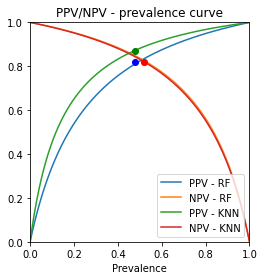

In [ ]:
import matplotlib.pyplot as plt

sens = 0.84
spec = 0.82

prevs = np.array(range(101))
formula_ppv = lambda x: sens*x/(sens*x + (1-spec)*(1-x))
formula_npv = lambda x: spec*(1-x)/(spec*(1-x) + (1-sens)*x)

ppvs = np.array([formula_ppv(p/100.0) for p in prevs])
npvs = np.array([formula_npv(p/100.0) for p in prevs])

plt.plot(prevs/100.0, ppvs, label= "PPV - RF")
plt.plot([0.48], [0.82], 'bo')
plt.plot(prevs/100.0, npvs, label= "NPV - RF")
plt.plot([0.52], [0.82], 'o', color='orange')

sens = 0.82
spec = 0.89

prevs = np.array(range(101))
formula_ppv = lambda x: sens*x/(sens*x + (1-spec)*(1-x))
formula_npv = lambda x: spec*(1-x)/(spec*(1-x) + (1-sens)*x)

ppvs = np.array([formula_ppv(p/100.0) for p in prevs])
npvs = np.array([formula_npv(p/100.0) for p in prevs])

plt.plot(prevs/100.0, ppvs, label= "PPV - KNN")
plt.plot([0.48], [0.87], 'go')
plt.plot(prevs/100.0, npvs, label= "NPV - KNN")
plt.plot([0.52], [0.82], 'ro')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Prevalence')
#plt.ylabel('PPV')
plt.legend(loc="lower right")
plt.title('PPV/NPV - prevalence curve')
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.savefig("ppv-prev-hemo.png", dpi=300)
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

importances_mean = {}
importances_std = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=seed[name])

for name in names:
  print(name)
  clf = best_models[name]
  clf.fit(X_train, y_train)
  result = permutation_importance(clf, X_test, y_test, random_state=seed[name], scoring='roc_auc')
  importances_mean[name] = np.abs(result.importances_mean)
  importances_std[name] = result.importances_std
  

LR
KNN
SVM
RF
NB


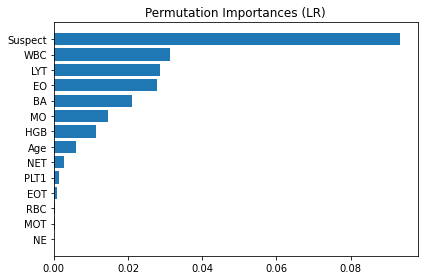

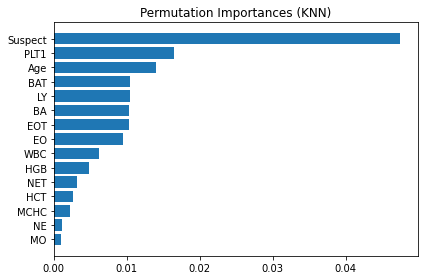

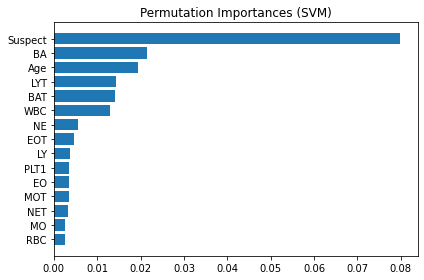

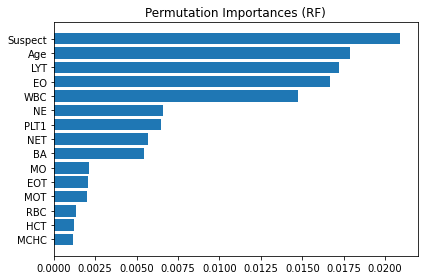

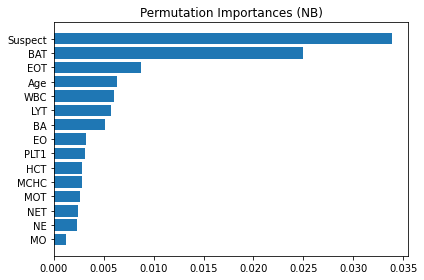

In [ ]:
import matplotlib.pyplot as plt

importances_mean_temp = {}

for name in names:
  importances_mean_temp[name] = importances_mean[name][selected_feats[name]]
  sorted_idx = importances_mean_temp[name].argsort()
  fig, ax = plt.subplots()
  
  ax.barh(X.columns[selected_feats[name]][sorted_idx][::-1][:15][::-1],
          importances_mean_temp[name][sorted_idx][::-1][:15][::-1])
  ax.set_title("Permutation Importances (" + name + ")")
  fig.tight_layout()
  plt.savefig("importances_" + name + ".png", dpi=300)
  plt.show()

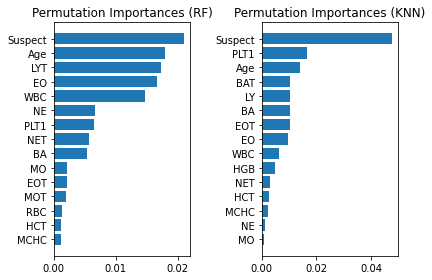

In [ ]:
importances_mean_temp = {}

fig, axes = plt.subplots(nrows=1, ncols=2)

i = 0
for name in ['RF','KNN']:
  importances_mean_temp[name] = importances_mean[name][selected_feats[name]]
  sorted_idx = importances_mean_temp[name].argsort()
  
  axes[i].barh(X.columns[selected_feats[name]][sorted_idx][::-1][:15][::-1],
          importances_mean_temp[name][sorted_idx][::-1][:15][::-1])
  axes[i].set_title("Permutation Importances (" + name + ")")

  i+=1

fig.tight_layout()

plt.savefig("importances_best.png", dpi=300)

plt.show()


In [ ]:
for name in names:
  print(name)
  print(X.columns[selected_feats[name]])

LR
Index(['Age', 'HGB', 'RBC', 'WBC', 'PLT1', 'NE', 'MO', 'EO', 'BA', 'NET',
       'LYT', 'MOT', 'EOT', 'Suspect'],
      dtype='object')
KNN
Index(['Age', 'HCT', 'HGB', 'MCHC', 'MCV', 'RBC', 'WBC', 'PLT1', 'NE', 'LY',
       'MO', 'EO', 'BA', 'NET', 'LYT', 'MOT', 'EOT', 'BAT', 'Suspect'],
      dtype='object')
SVM
Index(['Age', 'HCT', 'HGB', 'RBC', 'WBC', 'PLT1', 'NE', 'LY', 'MO', 'EO', 'BA',
       'NET', 'LYT', 'MOT', 'EOT', 'BAT', 'Suspect'],
      dtype='object')
RF
Index(['Age', 'HCT', 'HGB', 'MCHC', 'RBC', 'WBC', 'PLT1', 'NE', 'MO', 'EO',
       'BA', 'NET', 'LYT', 'MOT', 'EOT', 'BAT', 'Suspect'],
      dtype='object')
NB
Index(['Age', 'HCT', 'HGB', 'MCHC', 'RBC', 'WBC', 'PLT1', 'NE', 'MO', 'EO',
       'BA', 'NET', 'LYT', 'MOT', 'EOT', 'BAT', 'Suspect'],
      dtype='object')


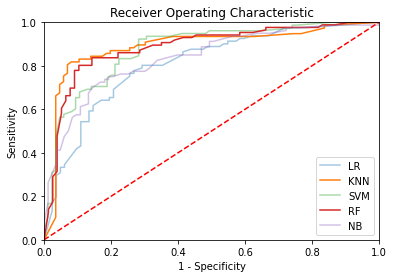

In [ ]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt




# Compute fpr, tpr, thresholds and roc auc
for name in names:
  roc_auc = auc(fprs[name], tprs[name])

  # Plot ROC curve
  plt.plot(fprs[name], tprs[name], label= "%s" % (name), alpha=1 if name in ['RF', 'KNN'] else 0.4)
  print()

plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('roc_curve_hemo.png', dpi=300)

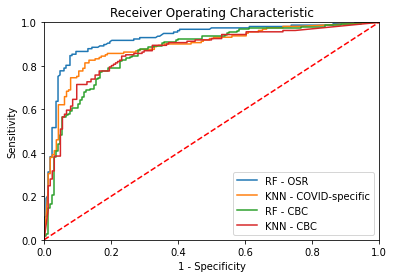

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, make_scorer
from sklearn.metrics import brier_score_loss, cohen_kappa_score
from sklearn.metrics import precision_recall_curve
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from joblib import dump, load
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

names = ['RF - OSR', 'KNN - COVID-specific', 'RF - CBC', 'KNN - CBC']
seed = {'RF - OSR':389296,  'KNN - COVID-specific': 725660,
        'RF - CBC':389296,  'KNN - CBC': 725660}
fprs = {}
tprs = {}
roc_thresholds = {}

for name in names:
  model = load(name + ".joblib")
  X_local = X if 'OSR' in name else X_pred if 'COVID' in name else X_hemo
  X_train, X_test, y_train, y_test = train_test_split(X_local, y, train_size=0.80, random_state=seed[name])

  clf = model#CalibratedClassifierCV(model, cv=2, method='isotonic')

  clf.fit(X_train, y_train)
  fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
  fprs[name] = fpr
  tprs[name] = tpr
  roc_thresholds[name] = thresholds

  plt.plot(fprs[name], tprs[name], label= "%s" % (name))

plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('roc_curve_all.png', dpi=300)

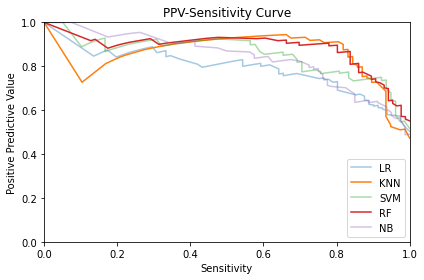

In [ ]:
# Compute precision-recall curve
for name in names:
  area = auc(recalls[name], precisions[name])

  # Plot ROC curve
  plt.plot(recalls[name], precisions[name], label= "%s" % (name), alpha=1 if name in ['RF','KNN'] else 0.4)
  print()

#plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Sensitivity')
plt.ylabel('Positive Predictive Value')
plt.title('PPV-Sensitivity Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('pr_curve.png', dpi=300)

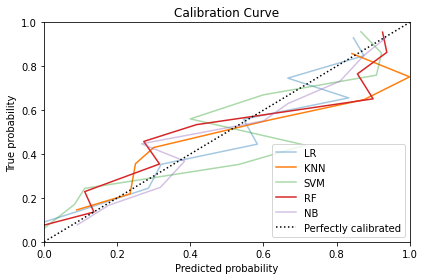

In [ ]:
# Compute calibration curve
for name in names:

  # Plot curve
  plt.plot(fops[name], mpvs[name], label= "%s" % (name), alpha=1 if name in ['RF','KNN'] else 0.4)
  print()

plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('cal_curve.png', dpi=300)

Text(32.79785879629631, 0.5, '10^9/L')
Text(268.169140625, 0.5, '10^9/L')
Text(500.16542245370374, 0.5, 'mmol/L')
Text(726.4117042824074, 0.5, 'U/L')
Text(26.54785879629631, 0.5, '10^9/L')
Text(255.669140625, 0.5, 'U/L')
Text(497.29042245370374, 0.5, 'mg/L')
Text(726.2867042824074, 0.5, 'mg/mL')


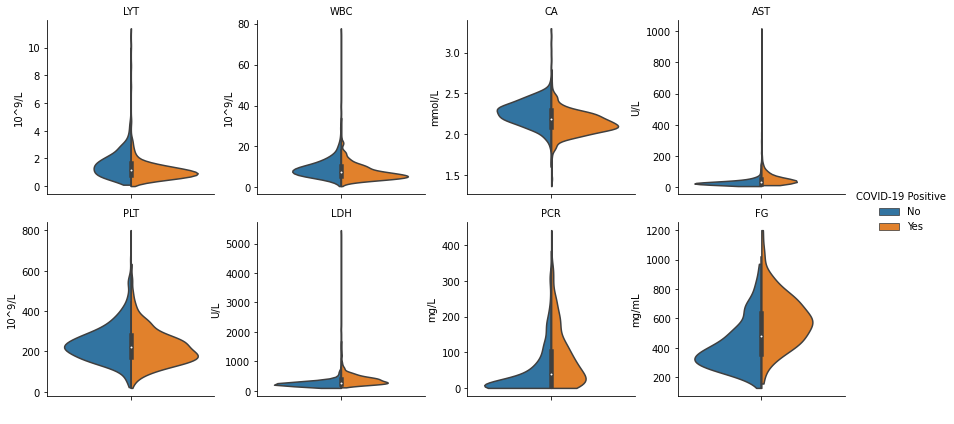

In [ ]:
X_temp = X[['LYT','WBC','CA','AST','PLT1','LDH','PCR','FG']].copy()
X_temp.columns = ['LYT','WBC','CA','AST','PLT','LDH','PCR','FG']
units = ['10^9/L','10^9/L','mmol/L','U/L','10^9/L','U/L','mg/L','mg/mL']
X_temp['COVID-19 Positive'] = y
X_temp['COVID-19 Positive'] = y
X_temp['COVID-19 Positive'] = X_temp['COVID-19 Positive'].apply(lambda x: 'Yes' if x==1 else 'No')


temp = X_temp.melt(id_vars=['COVID-19 Positive'], var_name='variable', value_name='values')
temp[' '] = ""

#temp = X[X.columns[sorted_idx][::-1][:20][::-1]].melt(var_name='variable', value_name='values')
g = sns.catplot(x=" ", y="values",
                col="variable", sharey=False, cut = 0,
                data=temp, kind="violin", split=True, hue='COVID-19 Positive',
                height=3, aspect=1, col_wrap=4)
g.set_titles("{col_name}")
axes = g.axes.flatten()
for a in range(len(axes)):
  print(axes[a].set_ylabel(units[a]))
g.savefig('violinplots.png',dpi=300)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


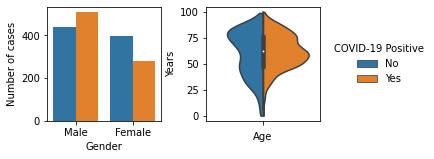

In [ ]:
import matplotlib.pyplot as plt

X_temp = X.loc[:,['Sex','Age']].copy()

X_temp.columns = ['Gender','Age']
X_temp['Gender'] = X_temp['Gender'].apply(lambda x: 'Male' if x > 0 else 'Female')
X_temp['Age'] = X_temp['Age'].astype('float64')
X_temp['COVID-19 Positive'] = y
X_temp['COVID-19 Positive'] = X_temp['COVID-19 Positive'].apply(lambda x: 'Yes' if x == 1 else 'No')

temp = X_temp.melt(id_vars=['COVID-19 Positive'], var_name='variable', value_name='values')

temp_age = temp[temp['variable'] == 'Age']
temp_age['values'] = temp_age['values'].astype('float64')
temp_age[' '] = ""


fig, axes = plt.subplots(nrows=1, ncols=2)
sns.countplot(x="values", hue="COVID-19 Positive", data=temp[temp['variable'] == 'Gender'], ax=axes[0])
sns.violinplot( x= " ", y="values", cut = 0,
                data=temp_age,
                split=True, hue='COVID-19 Positive', ax=axes[1])

plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", title="COVID-19 Positive", frameon=False)

#g.axes.flatten()[0].set_xticklabels(["Female", "Male"])
#g.axes.flatten()[1].set_xticklabels(["No", "Yes"])

axes[0].set_ylabel("Number of cases")
axes[0].set_xlabel("Gender")
axes[0].get_legend().remove()

axes[1].set_ylabel("Years")
axes[1].set_xlabel("Age")

axes[0].set(aspect=1./axes[0].get_data_ratio(), adjustable='box')
axes[1].set(aspect=1./axes[1].get_data_ratio(), adjustable='box')

fig.tight_layout(pad=0.5)

fig.savefig('bars.png',dpi=300)